# Factors Affecting A&E Time

## Investigation Overview
This investigation will look into the data collected in the A&E admission to determine the factors that affects A&E Time for admitted patient

## Dataset Overview
The dataset is a portion from the NHS England project to create synthetic A&E data. The data used consists of approximately 326,000 admission from one A&E provider with attributes such as ...

In [74]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [75]:
analysis=pd.read_csv('dataset_for_analysis.csv')

In [76]:
def rename_variable(x):
    new_name = {'IMD_Decile_From_LSOA':'Measure of Deprivation (decile)',
    'Age_Band':'Age',
    'Sex':'Sex',
    'AE_Arrive_HourOfDay':'Hour of Arrival in A&E',
    'AE_Time_Mins': 'Time Spent in the A&E(min)',
    'AE_HRG':'Healthcare Resource Grouping',
    'AE_Num_Diagnoses': 'Number of Diagnoses at the A&E',
    'AE_Num_Investigations': 'Number of Investigations at the A&E',
    'AE_Num_Treatments': 'Number of Treatments at the A&E',
    'AE_Arrival_Mode':'Mode of Transpo to A&E',
    'Provider_Patient_Distance_Miles': 'Provider to Patient Distance (miles)',
    'Admission_Method': 'Admission Method',
    'ICD10_Chapter_Code':'ICD10 Chapter',
    'Treatment_Function_Code': 'Treatment Function',
    'Length_Of_Stay_Days': 'Time Spent Admitted(days)',
    'Year':'Year',
    'Month':'Month',
    'Weekday':'Day of the Week',
    'median':'Median Daily Number of Admissions',
    'log_ae_time':'Time Spent in the A&E (min)',
    'log_admission': 'Log of Time Spent Admitted (days)',
    'log_distance': 'Log of Provider-Patient distance(miles)'
    }
    return new_name[x]

In [77]:
def get_order(column):
    ordinal_columns_dict={\
        'IMD_Decile_From_LSOA': [1,2,3,4,5,6,7,8,9,10],
        'Age_Band':['1-17','18-24','25-44', '45-64', '65-84', '85+'],
        'AE_HRG':['Nothing','Low','Medium','High'],
        'Year':['2014', '2015', '2016', '2017', '2018'],
        'Month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
        'Sep','Oct','Nov','Dec'],
        'Weekday':['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
        'AE_Arrive_HourOfDay':['01-04','05-08','09-12','13-16','17-20','21-24']
        }
    return ordinal_columns_dict[column]

In [78]:
def create_histogram(data, x, y, binwidth=1):
    var=rename_variable(x)
    plt.figure(figsize=(16,8))
    sns.histplot(data=data, x=x, hue=y, palette='Blues', binwidth=binwidth)
    plt.xlabel(var)


In [79]:
# Create a function that converts columns into category
def covert_to_categorical(df, column_list):
    for column in column_list:
        df[column] = df[column].astype('category')
# Create a list of columns to be made into ordered categorical data
ordinal_columns = [\
    'IMD_Decile_From_LSOA',
    'Age_Band',
    'AE_Arrive_HourOfDay',
    'AE_HRG',
    'Year',
    'Month',
    'Weekday'
    ]
# Convert the ordered_categorical_columns into category type
covert_to_categorical(analysis,ordinal_columns)
# Create a dictionary that shows the order of the values
ordinal_columns_dict={\
    'IMD_Decile_From_LSOA': [1,2,3,4,5,6,7,8,9,10],
    'Age_Band':['1-17','18-24','25-44', '45-64', '65-84', '85+'],
    'AE_HRG':['Nothing','Low','Medium','High'],
    'Year':['2014', '2015', '2016', '2017', '2018'],
    'Month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug',
    'Sep','Oct','Nov','Dec'],
    'Weekday':['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
    'AE_Arrive_HourOfDay':['01-04','05-08','09-12','13-16','17-20','21-24']
    }
# Create a function that uses a dictionary to order the ordinal columns
def order_categorical(df, column_dict):
    for column in column_dict:
        df[column] = df[column].cat.set_categories(column_dict[column], ordered=True)
# Order the ordinal categorical data
order_categorical(analysis,ordinal_columns_dict)

# Time Spent in the ER

In [93]:
# Since log10(0) is infinite and since 0min spent in 
# and A&E would need more industry knowledge if such is applicable or not,
# I resolved that moving forward I would filter out rows that have 0 for their AE_Time_Mins
analysis=analysis[analysis['AE_Time_Mins']>0]
# Compute for the log value of the time in min
analysis['log_ae_time']=analysis['AE_Time_Mins'].apply(lambda x: np.log10(x))
# I want to show the two groups up to the median and above the median
median=analysis['AE_Time_Mins'].median()
analysis['AE_Time_Grouping']=analysis['AE_Time_Mins'].apply(lambda x: '>240min' if x>median else '<=240min')


In [96]:
print(analysis.groupby('AE_Time_Grouping')['AE_Time_Grouping'].count())

AE_Time_Grouping
<=240min    208291
>240min     112554
Name: AE_Time_Grouping, dtype: int64


Text(0.5, 1.0, 'Histogram of the Time Spent in the A&E (min)')

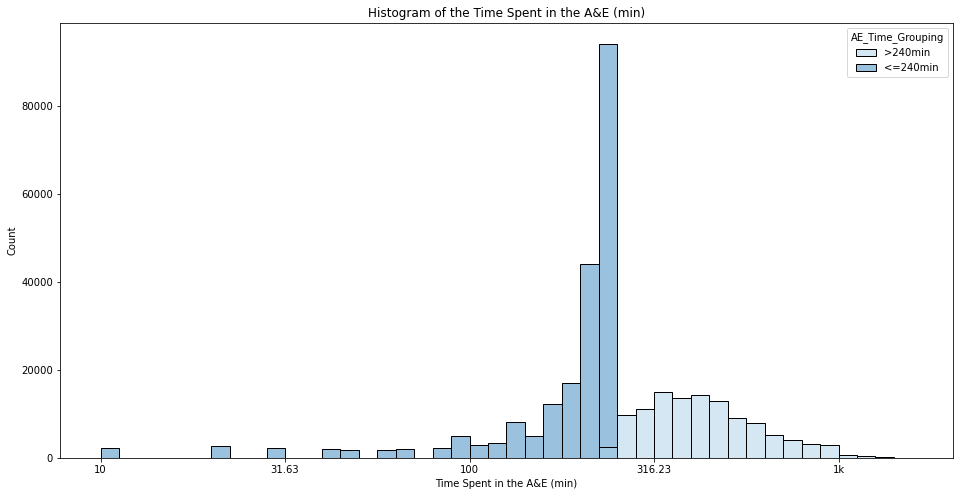

In [97]:
create_histogram(analysis,'log_ae_time','AE_Time_Grouping',0.05)
# Change the xticks to be more understandable
plt.xticks([1.0,1.5,2.0,2.5,3.0], [10, 31.63, 100, 316.23, '1k'])
var = rename_variable('log_ae_time')
plt.title(f'Histogram of the {var}')

# Patient profile

[Text(0, 0.5, 'Count')]

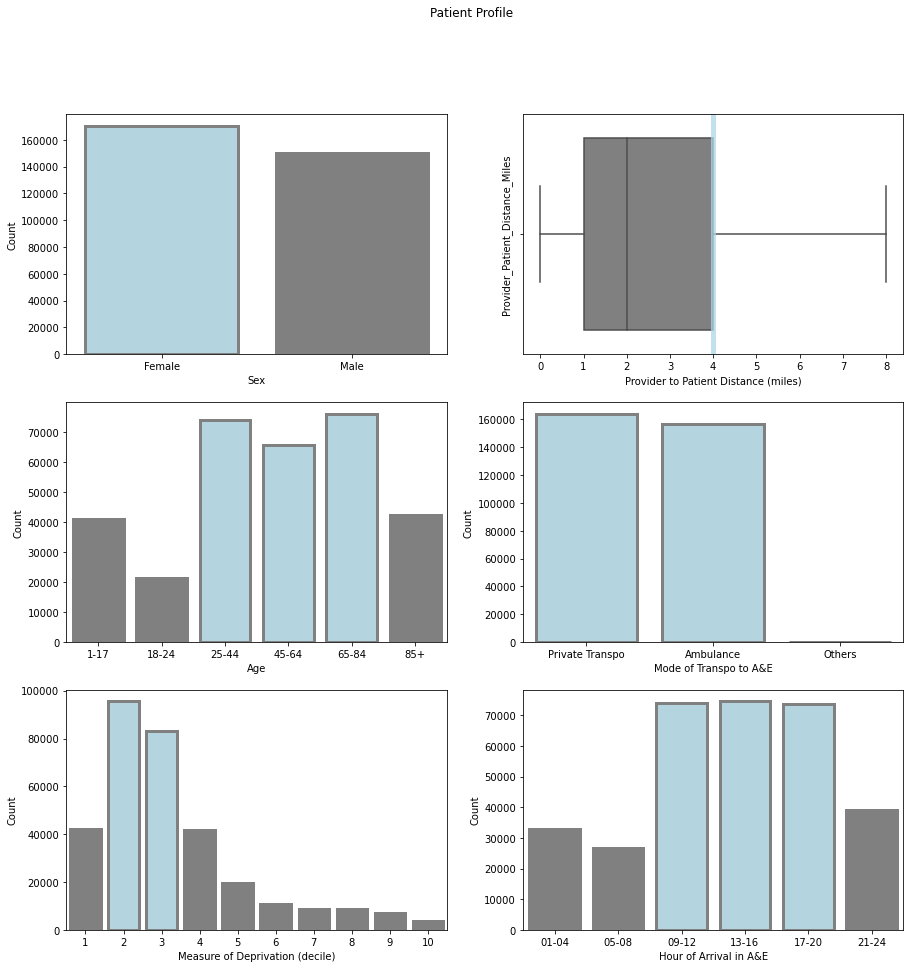

In [82]:
# Plot the different stats
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), sharey=False)
fig.suptitle('Patient Profile')

# By Sex
color = ['lightblue', 'grey']
sns.countplot(ax=axes[0,0], data=analysis, x='Sex', linewidth=3, edgecolor="0.5", palette=color)
axes[0,0].set(xlabel=rename_variable('Sex'))
axes[0,0].set(ylabel='Count')

# By Age
color = ['grey', 'grey','lightblue','lightblue','lightblue','grey']
sns.countplot(ax=axes[1,0], data=analysis, x='Age_Band', linewidth=3, edgecolor="0.5", palette=color)
axes[1,0].set(xlabel=rename_variable('Age_Band'))
axes[1,0].set(ylabel='Count')

# By Measure of Deprivation
color = ['grey', 'lightblue','lightblue','grey','grey','grey','grey','grey','grey','grey']
sns.countplot(ax=axes[2,0], data=analysis, x='IMD_Decile_From_LSOA', linewidth=3, edgecolor="0.5", palette=color)
axes[2,0].set(xlabel=rename_variable('IMD_Decile_From_LSOA'))
axes[2,0].set(ylabel='Count')

# By Distance from provider
sns.boxplot(ax=axes[0,1], data=analysis,x='Provider_Patient_Distance_Miles', color='grey', showfliers=False)
axes[0,1].axvline(4, color='lightblue', alpha=0.75, lw=5)
axes[0,1].set(xlabel=rename_variable('Provider_Patient_Distance_Miles'))
axes[0,1].set(ylabel='Provider_Patient_Distance_Miles')

# By Mode of arrival
color = ['lightblue', 'lightblue']
sns.countplot(ax=axes[1,1], data=analysis, x='AE_Arrival_Mode', linewidth=3, edgecolor="0.5", palette=color)
axes[1,1].set(xlabel=rename_variable('AE_Arrival_Mode'))
axes[1,1].set(ylabel='Count')

# By Time of arrival
color = ['grey', 'grey','lightblue','lightblue','lightblue','grey']
sns.countplot(ax=axes[2,1], data=analysis, x='AE_Arrive_HourOfDay', linewidth=3, edgecolor="0.5", palette=color)
axes[2,1].set(xlabel=rename_variable('AE_Arrive_HourOfDay'))
axes[2,1].set(ylabel='Count')

# Insights

In [83]:
def create_mvpointplot(data, x, y, z):
    x_rename = rename_variable(x)
    y_rename = rename_variable(y)
    z_rename = rename_variable(z)
    plt.figure(figsize=(16,8))
    ax=sns.pointplot(data=data, x=x, y=y, hue=z, palette=['lightgrey','blue','grey','lightblue'], errorbar='ci', estimator=np.median, alpha=0.5)
    #ax.axhline(data['AE_Time_Mins'].median(), color='green', alpha=0.75)
    plt.xlabel(x_rename)
    plt.ylabel(y_rename)
    plt.title(f'{x_rename} x Median {y_rename} grouped by {z_rename})')  

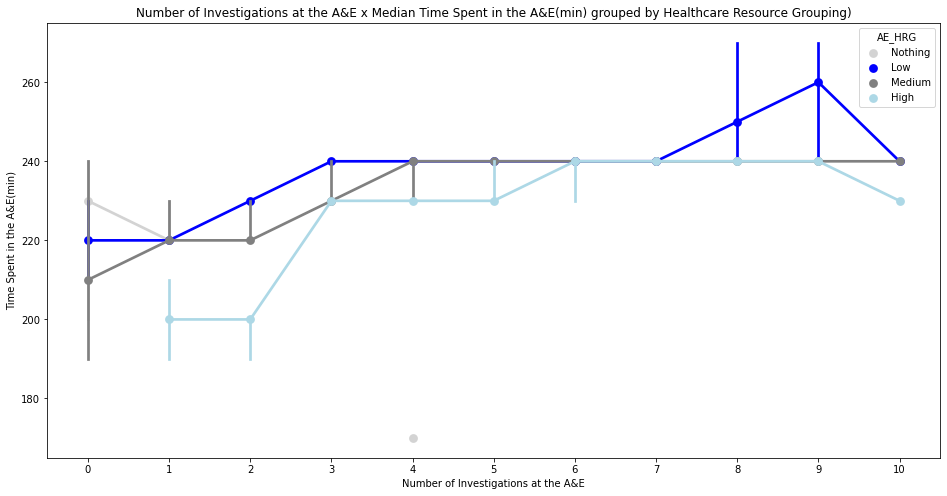

In [84]:
create_mvpointplot(analysis,'AE_Num_Investigations','AE_Time_Mins','AE_HRG')

Up to 6 investigations, an increase in number of investigations also increases the time spent in A&E. Patient that require high healthcare resources spent the least amount in the A&E while the low resource group have the highest and at 8-9 investigation, its median time exceeded 240min which is the median time of the dataset.

[Text(0.5, 1.0, 'Transpo Mode: Private Transpo')]

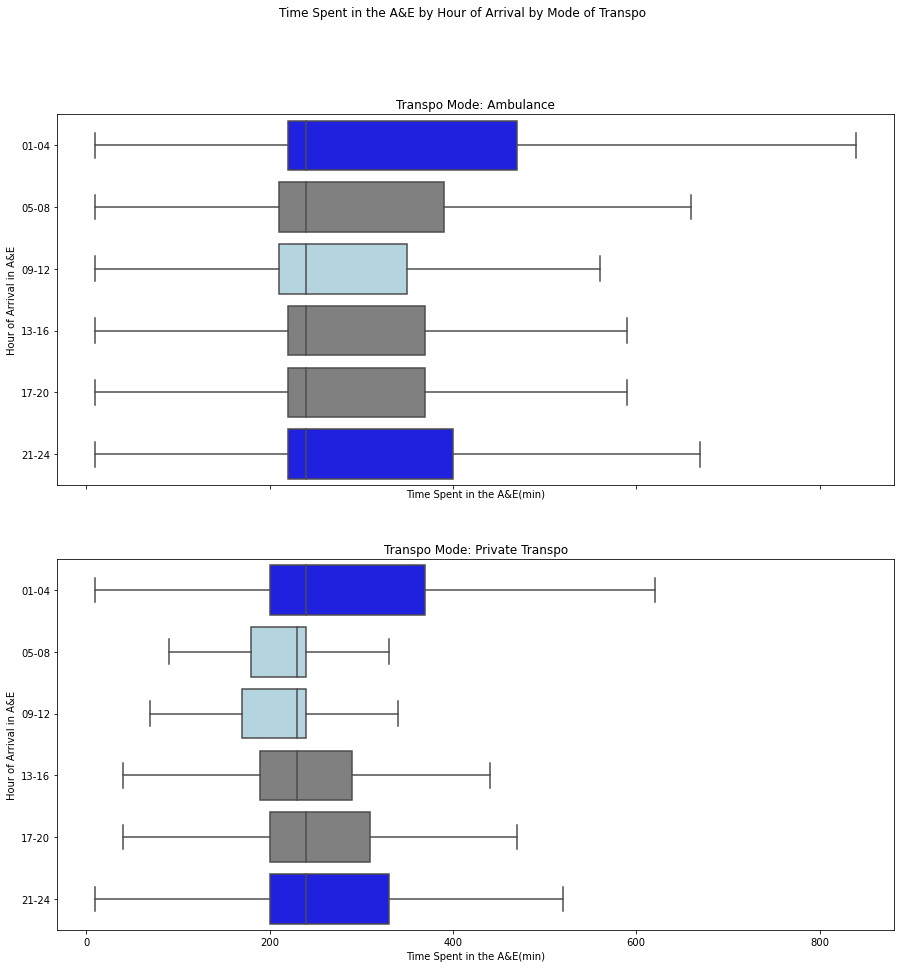

In [85]:
# Plot the different stats
fig, axes = plt.subplots(nrows=2, figsize=(15,15), sharex=True)
fig.suptitle('Time Spent in the A&E by Hour of Arrival by Mode of Transpo')

# By Transpo mode 1
color = ['blue', 'grey', 'lightblue','grey','grey','blue']
sns.boxplot(ax=axes[0], data=analysis[analysis['AE_Arrival_Mode']=='Ambulance'], x='AE_Time_Mins', y='AE_Arrive_HourOfDay', palette=color, showfliers=False)
axes[0].set(xlabel=rename_variable('AE_Time_Mins'))
axes[0].set(ylabel=rename_variable('AE_Arrive_HourOfDay'))
axes[0].set(title='Transpo Mode: Ambulance')

# By Transpo mode 2
color = ['blue', 'lightblue', 'lightblue','grey','grey','blue']
sns.boxplot(ax=axes[1], data=analysis[analysis['AE_Arrival_Mode']=='Private Transpo'], x='AE_Time_Mins', y='AE_Arrive_HourOfDay', palette=color, showfliers=False)
axes[1].set(xlabel=rename_variable('AE_Time_Mins'))
axes[1].set(ylabel=rename_variable('AE_Arrive_HourOfDay'))
axes[1].set(title='Transpo Mode: Private Transpo')


The minimum A&E time for all hours of the day is lowest for patients that came in via ambulances but they also have the highest upper limit. For all transpo method, the hour of the day that see the highest proportion of patients staying more than 240min is at 0100-0400 followed by 2100-2400. Patient brought in via ambulance stayed the least in the AE if they come in at 0900-12000, while the median time is lower than 240min during 0500-1600 for those that use private transportation.

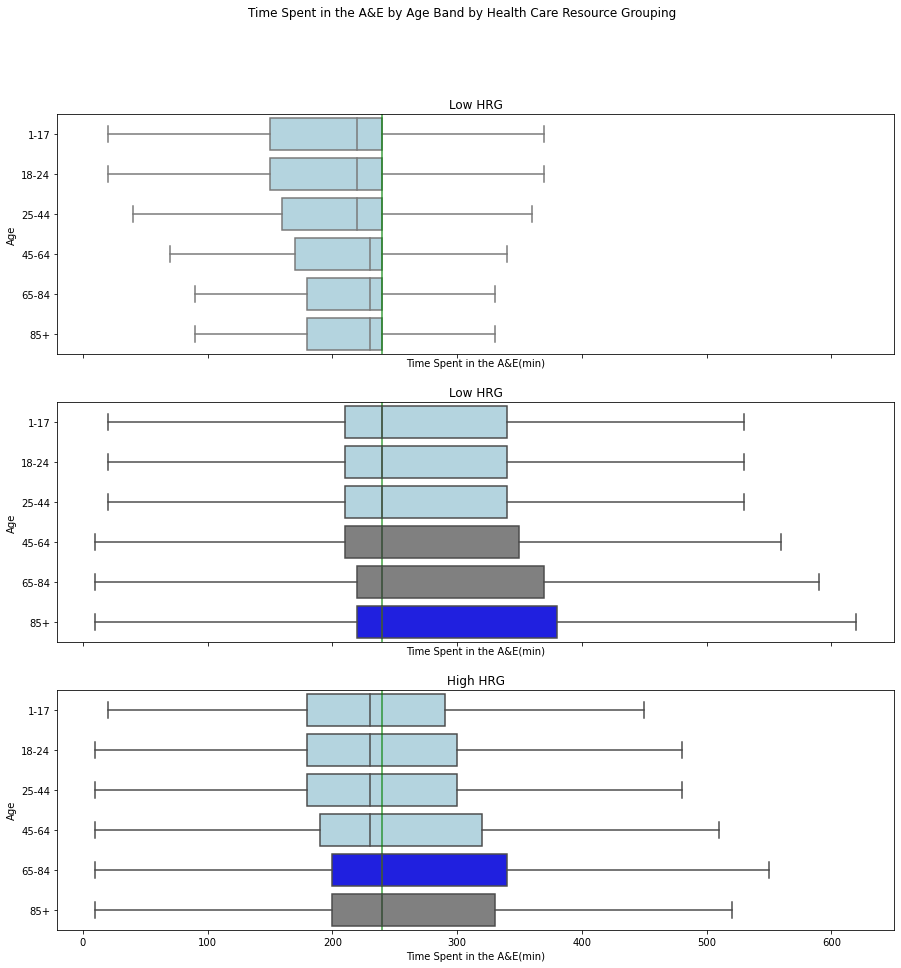

In [88]:
# Plot the different stats
fig, axes = plt.subplots(nrows=3, figsize=(15,15), sharex=True)
fig.suptitle('Time Spent in the A&E by Age Band by Health Care Resource Grouping')

# By Low HRG
color = ['lightblue', 'lightblue', 'lightblue','lightblue','lightblue','lightblue']
sns.boxplot(ax=axes[0], data=analysis[analysis['AE_HRG']=='Nothing'], x='AE_Time_Mins', y='Age_Band', palette=color, showfliers=False)
axes[0].set(xlabel=rename_variable('AE_Time_Mins'))
axes[0].set(ylabel=rename_variable('Age_Band'))
axes[0].set(title='Low HRG')
axes[0].axvline(analysis['AE_Time_Mins'].median(), color='green', alpha=0.75)

# By Low HRG
color = ['lightblue', 'lightblue', 'lightblue','grey','grey','blue']
sns.boxplot(ax=axes[1], data=analysis[analysis['AE_HRG']=='Low'], x='AE_Time_Mins', y='Age_Band', palette=color, showfliers=False)
axes[1].set(xlabel=rename_variable('AE_Time_Mins'))
axes[1].set(ylabel=rename_variable('Age_Band'))
axes[1].set(title='Low HRG')
axes[1].axvline(analysis['AE_Time_Mins'].median(), color='green', alpha=0.75)

# By High HRG
color = ['lightblue', 'lightblue', 'lightblue','lightblue','blue','grey']
sns.boxplot(ax=axes[2], data=analysis[analysis['AE_HRG']=='High'], x='AE_Time_Mins', y='Age_Band', palette=color, showfliers=False)
axes[2].set(xlabel=rename_variable('AE_Time_Mins'))
axes[2].set(ylabel=rename_variable('Age_Band'))
axes[2].set(title='High HRG')
axes[2].axvline(analysis['AE_Time_Mins'].median(), color='green', alpha=0.75)

75% of patients of all age group that don't need healthcare resource are admitted by the 240min. The next group that have the lowest time in A&E are those that needs high healthcare resource with the median time being less than the population median for patients aged 1-64. For this group, those that are aged 65-84 have the longest time. The low health resource group have the highest limit in terms of time spent in the A&E with age bands from 1-44 having the lowest and the limit increasing as the age increase.